# MS0240 MAI Assignment 1 PCA: Question 2
Carry out PCA on a wine dataset.

This dataset is contains quantities of seven constituents found in each wine and the cultivator of the wine. The quantities are recorded in their respective units of measurement. The wines are grown in the same region in Italy but by three different cultivators.

In [188]:
# load necessary libraries for this task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

## Information about the dataset
This dataset has 7 continuous variables and 1 categorical variable which is `cultivator`

From the numerical summary, it can be seen that variables have different units of measurement. Variables also have differing magnitudes as the mean of each variable are have large ranges from each other

From the boxplot, it can be seen that `proline (mg/L)` has the largest box out of all the boxplots, implying that the magnitude is very large compared to all other variables.



In [189]:
wine_df = pd.read_csv('data/wine.csv', encoding= 'unicode_escape') # import data into pandas dataframe
wine_df.head() # making sure dataset loaded properly

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L),cultivator
0,14.23,1.71,127,3.06,0.28,5.64,1065,0
1,13.20,1.78,100,2.76,0.26,4.38,1050,0
2,13.16,2.36,101,3.24,0.30,5.68,1185,0
3,14.37,1.95,113,3.49,0.24,7.80,1480,0
4,13.24,2.59,118,2.69,0.39,4.32,735,0


In [190]:
wine_df['cultivator'] = wine_df['cultivator'].astype('object') # change cultivator to object as it is categorical

In [191]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   alcohol (%v/v at 20°C)       131 non-null    float64
 1   malic_acid (g/L)             131 non-null    float64
 2   magnesium (mg/L)             131 non-null    int64  
 3   flavanoids (mg/L)            131 non-null    float64
 4   nonflavanoid_phenols (mg/L)  131 non-null    float64
 5   color_intensity (units)      131 non-null    float64
 6   proline (mg/L)               131 non-null    int64  
 7   cultivator                   131 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 8.3+ KB


### Descriptive Summary

In [192]:
wine_df.describe()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,12.987786,2.324733,97.679389,1.984580,0.369008,5.079771,749.885496
std,0.797958,1.043741,11.576679,1.001207,0.118204,2.201531,322.561852
min,11.410000,0.740000,70.000000,0.340000,0.170000,1.280000,278.000000
25%,12.315000,1.645000,88.000000,0.880000,0.280000,3.250000,505.000000
50%,13.050000,1.880000,97.000000,2.110000,0.370000,4.900000,672.000000
75%,13.685000,2.975000,105.500000,2.890000,0.435000,6.275000,1005.000000
max,14.390000,5.510000,127.000000,3.740000,0.630000,10.680000,1547.000000


### Boxplot of all Constituents in wine

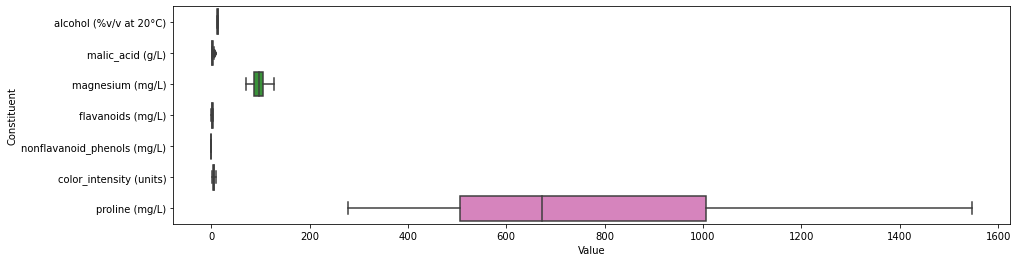

In [193]:
boxplot_df = wine_df.melt(id_vars=["cultivator"], 
                var_name="Constituent", 
                value_name="Value").drop(columns=["cultivator"])

plt.figure(figsize=(15,4))
sns.boxplot(x='Value', y='Constituent', data=boxplot_df)
plt.show()

## PCA on the dataset

### Data Preprocessing and PCA

In [194]:
reduced_df = wine_df.drop(columns=['cultivator']) # drop categorical column
reduced_df.head()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
0,14.23,1.71,127,3.06,0.28,5.64,1065
1,13.20,1.78,100,2.76,0.26,4.38,1050
2,13.16,2.36,101,3.24,0.30,5.68,1185
3,14.37,1.95,113,3.49,0.24,7.80,1480
4,13.24,2.59,118,2.69,0.39,4.32,735


In [195]:
scaler = StandardScaler() # instantiate StandardScaler object
scaler.fit(reduced_df) # fit StandardScaler on the original data

StandardScaler()

In [196]:
scaled_data = pd.DataFrame(scaler.transform(reduced_df), columns=reduced_df.columns) # Standardize dataset
scaled_data.head()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
0,1.562716,-0.591231,2.542453,1.078247,-0.755894,0.255449,0.980662
1,0.266967,-0.523908,0.201225,0.777458,-0.925743,-0.319077,0.933981
2,0.216646,0.033919,0.287937,1.258720,-0.586044,0.273688,1.354112
3,1.738838,-0.360407,1.328483,1.509377,-1.095592,1.240351,2.272176
4,0.317287,0.255126,1.762044,0.707274,0.178277,-0.346435,-0.046325


In [197]:
scaled_df = pd.concat([scaled_data, wine_df['cultivator']], axis=1) # Concatenate back the categorical variable
scaled_df.head()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L),cultivator
0,1.562716,-0.591231,2.542453,1.078247,-0.755894,0.255449,0.980662,0
1,0.266967,-0.523908,0.201225,0.777458,-0.925743,-0.319077,0.933981,0
2,0.216646,0.033919,0.287937,1.258720,-0.586044,0.273688,1.354112,0
3,1.738838,-0.360407,1.328483,1.509377,-1.095592,1.240351,2.272176,0
4,0.317287,0.255126,1.762044,0.707274,0.178277,-0.346435,-0.046325,0


In [198]:
pca = PCA(n_components=7).fit(scaled_data) # fit PCA object, use all 7 variables
pca_all_result = pca.transform(scaled_data) # transform dataset

### PCA Results Table

In [199]:
def pca_results(data, pca):
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    #PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions
    
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

pca_results = pca_results(scaled_data, pca) # use function created to show table
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
PC 1,3.0084,0.4265,0.4265,0.4118,-0.2166,0.3923,0.4317,-0.3888,0.1845,0.5080
PC 2,2.1718,0.3079,0.7344,0.3584,0.5076,0.2185,-0.3708,0.3265,0.5544,0.1209
PC 3,0.5888,0.0835,0.8178,-0.3204,0.3503,0.7918,0.0457,-0.1262,-0.2683,-0.2403
PC 4,0.4619,0.0655,0.8833,0.1060,0.5560,-0.3540,-0.0159,-0.7333,0.0108,-0.1272
PC 5,0.3959,0.0561,0.9395,-0.2835,-0.4337,0.1451,-0.2860,-0.3672,0.6202,-0.3305
PC 6,0.2398,0.0340,0.9734,-0.7041,0.2488,-0.1422,0.2676,0.0680,0.3140,0.4973
PC 7,0.1873,0.0266,1.0000,0.1093,0.1165,-0.0701,0.7214,0.2215,0.3212,-0.5449


## PCA: Cumulative Explained Variance >= 80%
Extract PCs with cumulative percentage of at least 80%, thus extract first 3 PCs

In [201]:
pca3 = PCA(n_components=3).fit(scaled_data) # fit a PCA object to extract first 2 PCs
pca3_results = pca3.transform(scaled_data)

In [202]:
pca3_components_df = pd.DataFrame(pca3.components_, columns=scaled_data.columns) # Linear system for PC1, PC2, PC3
pca3_components_df = pca3_components_df.rename(index={0:'PC1', 1:'PC2', 2:'PC3'})
pca3_components_df

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
PC1,0.411787,-0.216623,0.392271,0.431704,-0.388771,0.184531,0.508003
PC2,0.358439,0.507626,0.218459,-0.370840,0.326525,0.554404,0.120866
PC3,-0.320359,0.350294,0.791780,0.045703,-0.126181,-0.268342,-0.240274


### 3D Score Plots

In [207]:
total_var = pca3.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    pca3_results, x=0, y=1, z=2, color=scaled_df['cultivator'],
    title=f'3D Scoreplot: Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC1', '1': 'PC2', '2': 'PC3'}
)

fig.show()

### Scoreplot Matrix

In [208]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca3.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca3_results,
    labels=labels,
    dimensions=range(3),
    color=scaled_df['cultivator']
)
fig.update_traces(diagonal_visible=False)

fig.show()

### Working for part (c)

#### Function to calculate PC1, PC2, PC3 using variable values

In [ ]:
def calc_point(alc, malic, mag, flav, nonflav, color, prol): # calculate direction on biplot using wine constituent values
    variables = pd.DataFrame([[alc, malic, mag, flav, nonflav, color, prol]], columns=reduced_df.columns) # create dataframe for values
    variables_scaled = scaler.transform(variables)[0] # standardize the values (using fit from original data) and make into 1d array
    calc_pc1 = np.dot(np.array(pca3.components_)[0], variables_scaled) # calculate pc1
    calc_pc2 = np.dot(np.array(pca3.components_)[1], variables_scaled) # calculate pc2
    calc_pc3 = np.dot(np.array(pca3.components_)[2], variables_scaled) # calculate pc3

    return calc_pc1, calc_pc2, calc_pc3

In [209]:
score_pc1, score_pc2, score_pc3 = calc_point(12.75, 3.11, 96, 0.61, 0.52, 4.56, 632)

#### PC1 and PC2 Score plot

In [213]:
fig = px.scatter(pca3_results, x=0, y=1, color=scaled_df['cultivator']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    title='Score Plot with Point Calculated (PC1 and PC2)',
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Cultivator"
)

fig.add_trace( # plot the calculated score on the score plot
    go.Scatter(
        mode='markers',
        x=[score_pc1],
        y=[score_pc2],
        marker=dict(
            color='darkslateblue',
            size=14,
        ),
        showlegend=True,
        name='Point Calculated'
    )
)

fig.show()

#### PC1 and PC3 Score plot

In [214]:
fig = px.scatter(pca3_results, x=0, y=2, color=scaled_df['cultivator']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    title='Score Plot with Point Calculated (PC1 and PC3)',
    xaxis_title="PC1",
    yaxis_title="PC3",
    legend_title="Cultivator"
)

fig.add_trace( # plot the calculated score on the score plot
    go.Scatter(
        mode='markers',
        x=[score_pc1],
        y=[score_pc3],
        marker=dict(
            color='darkslateblue',
            size=14,
        ),
        showlegend=True,
        name='Point Calculated'
    )
)

fig.show()

#### PC2 and PC3 Score plot

In [215]:
fig = px.scatter(pca3_results, x=1, y=2, color=scaled_df['cultivator']) # create 2D scoreplot for PC1 and PC2
fig.update_layout(
    title='Score Plot with Point Calculated (PC2 and PC3)',
    xaxis_title="PC2",
    yaxis_title="PC3",
    legend_title="Cultivator"
)

fig.add_trace( # plot the calculated score on the score plot
    go.Scatter(
        mode='markers',
        x=[score_pc2],
        y=[score_pc3],
        marker=dict(
            color='darkslateblue',
            size=14,
        ),
        showlegend=True,
        name='Point Calculated'
    )
)

fig.show()